In [ ]:
pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.7 MB/s eta 0:00:00


In [ ]:
!pip install nibabel

In [ ]:
import pydicom
import nibabel as nib
# import dicom2nifti
import os


In [ ]:
# dicom_directory = 'Data2/ANON106/Dicom'
# output_file = 'Data2/ANON106/ANON106series3.nii.gz'

# dicom2nifti.convert_directory(dicom_directory, os.path.dirname(output_file))

# # The NIfTI file will be saved in the specified output directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/computer vision ass/kits19-master.zip" -d "/content/dataset"

Archive:  /content/drive/MyDrive/computer vision ass/kits19-master.zip
57eac1b36e2568c08fe43a7d0b50713ae76a834c
   creating: /content/dataset/kits19-master/
 extracting: /content/dataset/kits19-master/.gitignore  
  inflating: /content/dataset/kits19-master/LICENSE  
  inflating: /content/dataset/kits19-master/README.md  
  inflating: /content/dataset/kits19-master/changelog.md  
   creating: /content/dataset/kits19-master/data/
  inflating: /content/dataset/kits19-master/data/LICENSE  
   creating: /content/dataset/kits19-master/data/case_00000/
  inflating: /content/dataset/kits19-master/data/case_00000/segmentation.nii.gz  
   creating: /content/dataset/kits19-master/data/case_00001/
  inflating: /content/dataset/kits19-master/data/case_00001/segmentation.nii.gz  
   creating: /content/dataset/kits19-master/data/case_00002/
  inflating: /content/dataset/kits19-master/data/case_00002/segmentation.nii.gz  
   creating: /content/dataset/kits19-master/data/case_00003/
  inflating: /cont

In [ ]:
%cd /content/dataset/kits19-master
!pip install -r requirements.txt
!python3 -m starter_code.get_imaging

/content/dataset/kits19-master
300 cases to download...
Download 1/300: 
case_00000: 100% 225959/225960 [00:16<00:00, 13350.01KB/s]
Download 2/300: 
case_00001: 100% 276387/276388 [00:18<00:00, 14690.48KB/s]
Download 3/300: 
case_00002: 100% 101967/101968 [00:07<00:00, 13740.16KB/s]
Download 4/300: 
case_00003: 100% 118681/118682 [00:08<00:00, 14186.81KB/s]
Download 5/300: 
case_00004: 100% 25269/25270 [00:03<00:00, 8153.40KB/s] 
Download 6/300: 
case_00005: 100% 313477/313478 [00:21<00:00, 14862.58KB/s]
Download 7/300: 
case_00006: 100% 78010/78011 [00:06<00:00, 12286.99KB/s]
Download 8/300: 
case_00007: 100% 25826/25827 [00:09<00:00, 2629.19KB/s]
Download 9/300: 
case_00008: 100% 107068/107069 [00:10<00:00, 10120.25KB/s]
Download 10/300: 
case_00009: 100% 34134/34135 [00:03<00:00, 8778.73KB/s] 
Download 11/300: 
case_00010: 100% 23541/23542 [00:03<00:00, 7385.23KB/s] 
Download 12/300: 
case_00011: 100% 41268/41269 [00:04<00:00, 9477.86KB/s] 
Download 13/300: 
case_00012: 100% 43185/4

In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 67.6 MB/s eta 0:00:00


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from nilearn.image import resample_to_img

# -----------------------------
# Load the CT scan and segmentation NIfTI files
# -----------------------------
ct_file = '/content/dataset/kits19-master/data/case_00000/imaging.nii.gz'
seg_file = '/content/dataset/kits19-master/data/case_00000/segmentation.nii.gz'

# Load NIfTI data
ct_img = nib.load(ct_file)
seg_img = nib.load(seg_file)

# Check affine matrices and orientations
print("CT affine:")
print(ct_img.affine)
print("Segmentation affine:")
print(seg_img.affine)

ct_orientation = nib.aff2axcodes(ct_img.affine)
seg_orientation = nib.aff2axcodes(seg_img.affine)
print(f"CT orientation: {ct_orientation}")
print(f"Segmentation orientation: {seg_orientation}")

# Reorient both to RAS+ orientation (Right-Anterior-Superior)
ct_reoriented = nib.as_closest_canonical(ct_img)
seg_reoriented = nib.as_closest_canonical(seg_img)

# Resample segmentation to match CT dimensions and affine if needed
seg_resampled = resample_to_img(seg_reoriented, ct_reoriented, interpolation='nearest')

# Get reoriented data
ct_data = ct_reoriented.get_fdata()
seg_data = seg_resampled.get_fdata()

# Check if there's any offset in indices between the two volumes
seg_slices = [i for i in range(seg_data.shape[2]) if np.max(seg_data[:,:,i]) > 0]
print(f"Slices containing segmentations: {seg_slices}")

# Visualize the first slice with segmentation and corresponding CT slice
if seg_slices:
    test_slice = seg_slices[0]
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(ct_data[:,:,test_slice], cmap='gray')
    plt.title(f'CT Slice {test_slice}')
    plt.subplot(1, 2, 2)
    plt.imshow(seg_data[:,:,test_slice], cmap='jet')
    plt.title(f'Segmentation Slice {test_slice}')
    plt.show()

# -----------------------------
# Define Hounsfield windowing ranges for different tissues
# -----------------------------
# -----------------------------
# Define Hounsfield windowing ranges for different tissues
# -----------------------------
window_settings = {
    "lungs": {"level": -600, "window": 1500},
    "brain": {"level": 40, "window": 80},
    "liver": {"level": 30, "window": 150},
    "soft_tissue": {"level": 50, "window": 250},
    "bone": {"level": 400, "window": 1800},
    "kidney": {"level": 35, "window": 175},  # Added kidney settings
}

# Select the tissue to visualize (e.g., "lungs")
selected_tissue = "kidney"
window_center = window_settings[selected_tissue]["level"]
window_width = window_settings[selected_tissue]["window"]
window_min = window_center - (window_width / 2)
window_max = window_center + (window_width / 2)

# -----------------------------
# Define colors for different segmentation labels
# -----------------------------
label_colors = {
    1: (0, 255, 0),   # Green for label 1 (e.g., tumor)
    2: (255, 0, 0),   # Red for label 2 (e.g., another region)
    # Add more labels and colors as needed
}

# -----------------------------
# Process slices and visualize
# -----------------------------
num_slices = ct_data.shape[2]  # Number of slices (z-axis)
for slice_index in range(num_slices):
    # Extract CT and segmentation slices
    ct_slice = ct_data[:, :, slice_index]
    seg_slice = seg_data[:, :, slice_index]

    # Skip empty segmentation masks
    if np.max(seg_slice) == 0:
        continue

    # -----------------------------
    # Apply Hounsfield windowing
    # -----------------------------
    windowed_ct = np.clip(ct_slice, window_min, window_max)
    windowed_ct = ((windowed_ct - window_min) / (window_max - window_min) * 255).astype(np.uint8)
    # -----------------------------
    # Prepare segmentation mask and overlay
    # -----------------------------
    # Convert CT to RGB for colored overlays
    ct_rgb = cv2.cvtColor(windowed_ct, cv2.COLOR_GRAY2BGR)

    # Loop through unique labels in segmentation
    for label in np.unique(seg_slice):
        if label == 0:
            continue  # Skip background
        color = label_colors.get(label, (255, 255, 0))  # Default yellow if label not predefined
        binary_mask = (seg_slice == label).astype(np.uint8) * 255  # Binary mask for contour

        # Find and draw contours
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(ct_rgb, contours, -1, color, 1)  # Draw with thickness 1

    # -----------------------------
    # Plot CT, segmentation, and overlay
    # -----------------------------
    plt.figure(figsize=(18, 6))

    # CT slice (windowed)
    plt.subplot(1, 3, 1)
    plt.imshow(windowed_ct, cmap='gray')
    plt.title(f'{selected_tissue.capitalize()} Window - CT Slice {slice_index}')
    plt.axis('off')

    # Segmentation mask
    plt.subplot(1, 3, 2)
    plt.imshow(seg_slice, cmap='jet', alpha=0.7)
    plt.title(f'Segmentation Mask - Slice {slice_index}')
    plt.axis('off')

    # CT with contours
    plt.subplot(1, 3, 3)
    plt.imshow(ct_rgb)
    plt.title(f'CT with Contours - Slice {slice_index}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import numpy as np
import nibabel as nib
from pathlib import Path
from nilearn.image import resample_to_img
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
import random
import json
import datetime

def prepare_ct_segmentation_dataset(ct_file, seg_file, output_root_dir, patient_id, img_size=(512, 512), split='train'):
    """
    Convert NIfTI CT scans and their segmentation masks to PNG format,
    ensuring proper orientation (upright, not slanted) and consistent processing.
    Args:
        ct_file (str): Path to the CT scan NIfTI file.
        seg_file (str): Path to the segmentation NIfTI file.
        output_root_dir (str): Directory where processed images and masks will be saved.
        patient_id (str): Patient identifier.
        img_size (tuple): Target size for resizing images (width, height).
        split (str): Data split (train, val, or test)
    """
    # Create output directories for specific split
    split_dir = Path(output_root_dir) / split
    images_dir = split_dir / "images"
    masks_dir = split_dir / "masks"
    overlay_dir = split_dir / "overlays"  # For visualization

    images_dir.mkdir(parents=True, exist_ok=True)
    masks_dir.mkdir(parents=True, exist_ok=True)
    overlay_dir.mkdir(parents=True, exist_ok=True)

    # Load NIfTI data
    ct_img = nib.load(ct_file)
    seg_img = nib.load(seg_file)

    # Resample segmentation to match CT dimensions and affine
    seg_resampled = resample_to_img(seg_img, ct_img, interpolation='nearest', force_resample=True)

    # Get data arrays
    ct_data = ct_img.get_fdata()
    seg_data = seg_resampled.get_fdata()

    # Check segmentation data for valid labels
    unique_labels = np.unique(seg_data)
    print(f"Unique labels in segmentation for patient {patient_id}: {unique_labels}")

    # Log shape information
    print(f"CT data shape: {ct_data.shape}")
    print(f"Segmentation data shape: {seg_data.shape}")

    # Determine the correct orientation for axial slices (Z axis)
    # NIfTI files can have different orientations, so we need to determine
    # which dimension represents the Z axis (slice direction)

    # Typically for axial slices, we want to iterate through the last dimension
    # But we need to figure out the correct way to extract 2D slices with proper orientation
    num_slices = ct_data.shape[2]  # Assuming Z is the 3rd dimension

    # Find slices with segmentation
    seg_slices = [i for i in range(num_slices) if np.max(seg_data[:,:,i]) > 0]
    print(f"Found {len(seg_slices)} slices containing segmentations")

    # Process slices
    processed_count = 0
    slice_info = []  # Track processed slice info for the patient

    for slice_index in range(num_slices):
        # Extract CT and segmentation slices
        ct_slice = ct_data[:, :, slice_index]
        seg_slice = seg_data[:, :, slice_index]

        # Skip empty segmentation masks if desired
        if np.max(seg_slice) == 0 and len(seg_slices) > 10:  # Only skip if we have enough segmentation slices
            continue

        # FIX: Correct the orientation - rotate/flip to make the image upright
        # 1. Transpose to correct axis orientation
        ct_slice = np.rot90(ct_slice)  # Rotate 90 degrees
        seg_slice = np.rot90(seg_slice)

        # 2. If needed, flip horizontally/vertically to ensure proper orientation
        # Uncomment and adjust these lines if images are still not correctly oriented
        # ct_slice = np.flipud(ct_slice)  # Flip vertically
        # seg_slice = np.flipud(seg_slice)
        # ct_slice = np.fliplr(ct_slice)  # Flip horizontally
        # seg_slice = np.fliplr(seg_slice)

        # Apply the same lung window parameters as in the inference code
        window_center = -600  # Lung window center
        window_width = 1500   # Lung window width
        window_min = window_center - (window_width / 2)
        window_max = window_center + (window_width / 2)

        # Apply window level (clip and normalize to 0-255)
        windowed_ct = np.clip(ct_slice, window_min, window_max)
        normalized_ct = ((windowed_ct - window_min) / (window_max - window_min) * 255).astype(np.uint8)

        # Create binary mask for segmentation (1 for foreground, 0 for background)
        binary_mask = (seg_slice > 0).astype(np.uint8)

        # Convert numpy arrays to PIL images for consistent resizing
        ct_pil = Image.fromarray(normalized_ct)
        mask_pil = Image.fromarray(binary_mask * 255)  # Scale mask to 0-255 for saving

        # Resize to match the inference size (maintaining aspect ratio)
        ct_pil = ct_pil.resize(img_size, Image.BILINEAR)
        mask_pil = mask_pil.resize(img_size, Image.NEAREST)  # Use nearest neighbor for masks

        # Save the processed images
        ct_filename = f"{patient_id}_slice_{slice_index:03d}.png"
        mask_filename = f"{patient_id}_slice_{slice_index:03d}.png"

        ct_pil.save(images_dir / ct_filename)
        mask_pil.save(masks_dir / mask_filename)

        # Store slice information
        has_segmentation = np.max(binary_mask) > 0
        slice_info.append({
            "patient_id": patient_id,
            "slice_index": slice_index,
            "filename": ct_filename,
            "has_segmentation": bool(has_segmentation),
            "split": split
        })

        # Create and save overlay visualization
        if has_segmentation:  # Only create overlay for slices with segmentation
            # Convert back to numpy for contour detection
            mask_np = np.array(mask_pil)
            ct_np = np.array(ct_pil)

            # Create RGB version of CT for overlay
            ct_rgb = cv2.cvtColor(ct_np, cv2.COLOR_GRAY2BGR)

            # Find and draw contours
            contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            overlay = ct_rgb.copy()
            cv2.drawContours(overlay, contours, -1, (255, 0, 0), 1)  # Red contours

            # Save overlay
            overlay_pil = Image.fromarray(overlay)
            overlay_pil.save(overlay_dir / ct_filename)

        processed_count += 1

        # Save a debug visualization for the first slice with segmentation
        if has_segmentation and processed_count == 1:
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(np.array(ct_pil), cmap='gray')
            plt.title('CT Slice (Lung Window)')

            plt.subplot(1, 3, 2)
            plt.imshow(np.array(mask_pil), cmap='gray')
            plt.title('Binary Segmentation Mask')

            plt.subplot(1, 3, 3)
            if 'overlay_pil' in locals():
                plt.imshow(np.array(overlay_pil))
                plt.title('CT with Segmentation Contours')

            plt.savefig(f"{split_dir}/{patient_id}_orientation_check.png")
            plt.close()

    print(f"Processed {processed_count} slices for patient {patient_id} in {split} split")
    return slice_info

def try_all_orientations(ct_file, seg_file, output_dir, patient_id):
    """
    Try all possible orientations of the CT and segmentation slices
    to help determine the correct orientation visually.

    Args:
        ct_file (str): Path to the CT scan NIfTI file.
        seg_file (str): Path to the segmentation NIfTI file.
        output_dir (str): Directory to save orientation tests.
        patient_id (str): Patient identifier.
    """
    # Create output directory
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Load NIfTI data
    ct_img = nib.load(ct_file)
    seg_img = nib.load(seg_file)

    # Resample segmentation to match CT dimensions
    seg_resampled = resample_to_img(seg_img, ct_img, interpolation='nearest')

    # Get data arrays
    ct_data = ct_img.get_fdata()
    seg_data = seg_resampled.get_fdata()

    # Find a slice with segmentation
    slice_indices = []
    for axis in range(3):  # Try all three axes
        for i in range(ct_data.shape[axis] // 2 - 10, ct_data.shape[axis] // 2 + 10):
            if i < 0 or i >= ct_data.shape[axis]:
                continue
            if axis == 0 and np.max(seg_data[i, :, :]) > 0:
                slice_indices.append((axis, i))
                break
            elif axis == 1 and np.max(seg_data[:, i, :]) > 0:
                slice_indices.append((axis, i))
                break
            elif axis == 2 and np.max(seg_data[:, :, i]) > 0:
                slice_indices.append((axis, i))
                break

    # Create a large figure to show all orientations
    plt.figure(figsize=(20, 15))
    plot_idx = 1

    # Apply lung window settings
    window_center = -600
    window_width = 1500
    window_min = window_center - (window_width / 2)
    window_max = window_center + (window_width / 2)

    # For each axis with segmentation
    for axis, slice_idx in slice_indices:
        # Extract the appropriate slice
        if axis == 0:
            ct_slice = ct_data[slice_idx, :, :]
            seg_slice = seg_data[slice_idx, :, :]
            title_prefix = "X-axis"
        elif axis == 1:
            ct_slice = ct_data[:, slice_idx, :]
            seg_slice = seg_data[:, slice_idx, :]
            title_prefix = "Y-axis"
        else:
            ct_slice = ct_data[:, :, slice_idx]
            seg_slice = seg_data[:, :, slice_idx]
            title_prefix = "Z-axis"
        # Window CT data
        windowed_ct = np.clip(ct_slice, window_min, window_max)
        normalized_ct = ((windowed_ct - window_min) / (window_max - window_min) * 255).astype(np.uint8)
        # Create binary mask
        binary_mask = (seg_slice > 0).astype(np.uint8) * 255
        # Try different orientations
        orientations = [
            ("Original", normalized_ct, binary_mask),
            ("Rot90", np.rot90(normalized_ct), np.rot90(binary_mask)),
            ("Rot180", np.rot90(normalized_ct, 2), np.rot90(binary_mask, 2)),
            ("Rot270", np.rot90(normalized_ct, 3), np.rot90(binary_mask, 3)),
            ("FlipUD", np.flipud(normalized_ct), np.flipud(binary_mask)),
            ("FlipLR", np.fliplr(normalized_ct), np.fliplr(binary_mask)),
            ("Rot90+FlipUD", np.flipud(np.rot90(normalized_ct)), np.flipud(np.rot90(binary_mask))),
            ("Rot90+FlipLR", np.fliplr(np.rot90(normalized_ct)), np.fliplr(np.rot90(binary_mask)))
        ]

        # Plot each orientation
        for name, ct, mask in orientations:
            # Create overlay
            ct_rgb = cv2.cvtColor(ct, cv2.COLOR_GRAY2BGR)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            overlay = ct_rgb.copy()
            cv2.drawContours(overlay, contours, -1, (255, 0, 0), 1)

            plt.subplot(len(slice_indices), len(orientations), plot_idx)
            plt.imshow(overlay)
            plt.title(f"{title_prefix}: {name}")
            plt.axis('off')
            plot_idx += 1

    plt.tight_layout()
    plt.savefig(f"{output_dir}/{patient_id}_orientation_tests.png")
    plt.close()

    print(f"Created orientation test image at {output_dir}/{patient_id}_orientation_tests.png")

def verify_dataset_integrity(dataset_dir):
    """
    Verify the integrity of the generated dataset by loading a few examples
    and checking their normalization and orientation.

    Args:
        dataset_dir (str): Path to the dataset directory containing split folders.
    """
    # Check each split
    for split in ['train', 'val', 'test']:
        split_dir = Path(dataset_dir) / split
        images_dir = split_dir / "images"
        masks_dir = split_dir / "masks"

        if not images_dir.exists():
            print(f"No {split} split directory found.")
            continue

        # List all image files
        image_files = list(images_dir.glob("*.png"))

        if len(image_files) == 0:
            print(f"No images found in the {split} split.")
            continue

        print(f"Found {len(image_files)} images in the {split} split.")

        # Select a few random images to check
        num_samples = min(3, len(image_files))
        sample_indices = np.random.choice(len(image_files), num_samples, replace=False)

        # Create a figure to display samples
        plt.figure(figsize=(15, 3 * num_samples))

        for i, idx in enumerate(sample_indices):
            image_path = image_files[idx]
            mask_path = masks_dir / image_path.name

            # Load image and mask
            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Convert to numpy arrays
            image_np = np.array(image)
            mask_np = np.array(mask)

            # Create overlay for visualization
            image_rgb = cv2.cvtColor(image_np, cv2.COLOR_GRAY2BGR)
            contours, _ = cv2.findContours((mask_np > 128).astype(np.uint8),
                                           cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_SIMPLE)
            overlay = image_rgb.copy()
            cv2.drawContours(overlay, contours, -1, (255, 0, 0), 1)

            # Display
            plt.subplot(num_samples, 3, i*3 + 1)
            plt.imshow(image_np, cmap='gray')
            plt.title(f"{split.capitalize()}: {image_path.name}")

            plt.subplot(num_samples, 3, i*3 + 2)
            plt.imshow(mask_np, cmap='gray')
            plt.title(f"Mask")

            plt.subplot(num_samples, 3, i*3 + 3)
            plt.imshow(overlay)
            plt.title(f"Overlay")

        plt.tight_layout()
        plt.savefig(f"{dataset_dir}/{split}_verification.png")
        plt.close()

    print("Dataset verification complete. Verification images saved.")

def process_all_patients(base_dir, output_root_dir, img_size=(512, 512), train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42):
    """
    Process all patients' CT and segmentation files in the base directory and split into train/val/test sets.

    Args:
        base_dir (str): Path to the directory containing patient subdirectories.
        output_root_dir (str): Directory where processed images and masks will be saved.
        img_size (tuple): Target size for resizing images (width, height).
        train_ratio (float): Proportion of patients to use for training.
        val_ratio (float): Proportion of patients to use for validation.
        test_ratio (float): Proportion of patients to use for testing.
        random_seed (int): Random seed for reproducibility.
    """
    # Create output directory
    output_dir = Path(output_root_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    # Set random seed for reproducibility
    random.seed(random_seed)

    # Get list of all patient directories
    patient_dirs = []
    for patient_dir in os.listdir(base_dir):
        patient_path = os.path.join(base_dir, patient_dir)
        if os.path.isdir(patient_path):
            ct_file = os.path.join(patient_path, 'imaging.nii.gz')
            seg_file = os.path.join(patient_path, 'segmentation.nii.gz')

            # Check if both CT and segmentation files exist
            if os.path.exists(ct_file) and os.path.exists(seg_file):
                patient_dirs.append((patient_dir, patient_path, ct_file, seg_file))

    # Shuffle patient list
    random.shuffle(patient_dirs)

    # Calculate split sizes
    total_patients = len(patient_dirs)
    train_size = int(total_patients * train_ratio)
    val_size = int(total_patients * val_ratio)
    test_size = total_patients - train_size - val_size

    # Create splits
    train_patients = patient_dirs[:train_size]
    val_patients = patient_dirs[train_size:train_size + val_size]
    test_patients = patient_dirs[train_size + val_size:]

    print(f"Split {total_patients} patients into: {len(train_patients)} train, {len(val_patients)} validation, {len(test_patients)} test")

    # Save split information
    splits = {
        "train": [p[0] for p in train_patients],
        "val": [p[0] for p in val_patients],
        "test": [p[0] for p in test_patients],
        "ratios": {
            "train": train_ratio,
            "val": val_ratio,
            "test": test_ratio
        },
        "random_seed": random_seed
    }

    with open(output_dir / "dataset_splits.json", "w") as f:
        json.dump(splits, f, indent=2)

    # Process each patient according to their split
    all_slice_info = []

    # First, generate orientation test to find the correct orientation using first patient
    if train_patients:
        print("Generating orientation tests for first patient...")
        try_all_orientations(train_patients[0][2], train_patients[0][3], output_root_dir, patient_id=train_patients[0][0])

    # Process each split
    for split_name, patients in [("train", train_patients), ("val", val_patients), ("test", test_patients)]:
        print(f"\nProcessing {split_name} split:")

        for patient_id, patient_path, ct_file, seg_file in patients:
            print(f"Processing patient: {patient_id}")

            # Process the data with the correct orientation
            slice_info = prepare_ct_segmentation_dataset(
                ct_file=ct_file,
                seg_file=seg_file,
                output_root_dir=output_root_dir,
                patient_id=patient_id,
                img_size=img_size,
                split=split_name
            )

            all_slice_info.extend(slice_info)

    # Save dataset metadata with correct date format
    metadata = {
        "dataset_info": {
            "total_patients": total_patients,
            "total_slices": len(all_slice_info),
            "image_size": img_size,
            "creation_date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "splits": {
                "train": len(train_patients),
                "val": len(val_patients),
                "test": len(test_patients)
            }
        },
        "patient_splits": splits,
        "slice_info": all_slice_info
    }

    with open(output_dir / "dataset_metadata.json", "w") as f:
        json.dump(metadata, f, indent=2)

    print(f"\nFinished processing {total_patients} patients with a total of {len(all_slice_info)} slices")

    # Verify dataset integrity
    print("Verifying dataset integrity...")
    verify_dataset_integrity(output_root_dir)

    # Generate summary statistics
    train_slices = len([s for s in all_slice_info if s["split"] == "train"])
    val_slices = len([s for s in all_slice_info if s["split"] == "val"])
    test_slices = len([s for s in all_slice_info if s["split"] == "test"])

    print("\nDataset Summary:")
    print(f"Train: {len(train_patients)} patients, {train_slices} slices")
    print(f"Validation: {len(val_patients)} patients, {val_slices} slices")
    print(f"Test: {len(test_patients)} patients, {test_slices} slices")
    print(f"Total: {total_patients} patients, {len(all_slice_info)} slices")


# Example usage
if __name__ == "__main__":
    base_dir = '/content/dataset/kits19-master/data'  # Path to patient folders
    output_root_dir = 'Segmented_Radiomics_Data/RAD_dataset'  # Path for processed dataset

    # Use the same image size as in the inference code
    target_img_size = (512, 512)
    # Process patients with train/val/test split (70/15/15)
    process_all_patients(
        base_dir=base_dir,
        output_root_dir=output_root_dir,
        img_size=target_img_size,
        train_ratio=0.7,
        val_ratio=0.2,
        test_ratio=0.1,
        random_seed=42  # Set for reproducibility
    )

Split 210 patients into: 147 train, 42 validation, 21 test
Generating orientation tests for first patient...


<ipython-input-8-09cceb073e88>:193: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = resample_to_img(seg_img, ct_img, interpolation='nearest')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


Created orientation test image at Segmented_Radiomics_Data/RAD_dataset/case_00085_orientation_tests.png

Processing train split:
Processing patient: case_00085
Unique labels in segmentation for patient case_00085: [0. 1. 2.]
CT data shape: (87, 512, 512)
Segmentation data shape: (87, 512, 512)
Found 168 slices containing segmentations
Processed 168 slices for patient case_00085 in train split
Processing patient: case_00086
Unique labels in segmentation for patient case_00086: [0. 1. 2.]
CT data shape: (199, 512, 512)
Segmentation data shape: (199, 512, 512)
Found 241 slices containing segmentations
Processed 241 slices for patient case_00086 in train split
Processing patient: case_00001


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import nibabel as nib
from pathlib import Path
from nilearn.image import resample_to_img
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
import random
import json
import datetime
from google.colab import drive  # Added for Google Drive integration

# Mount Google Drive
drive.mount('/content/drive')

def prepare_ct_segmentation_dataset(ct_file, seg_file, output_root_dir, patient_id, img_size=(512, 512), split='train'):
    """
    Convert NIfTI CT scans and their segmentation masks to PNG format,
    ensuring proper orientation and consistent size (512x512).
    """
    # Create output directories for specific split
    split_dir = Path(output_root_dir) / split
    images_dir = split_dir / "images"
    masks_dir = split_dir / "masks"
    overlay_dir = split_dir / "overlays"  # For visualization

    images_dir.mkdir(parents=True, exist_ok=True)
    masks_dir.mkdir(parents=True, exist_ok=True)
    overlay_dir.mkdir(parents=True, exist_ok=True)

    # Load NIfTI data
    ct_img = nib.load(ct_file)
    seg_img = nib.load(seg_file)

    # Resample segmentation to match CT dimensions and affine
    seg_resampled = resample_to_img(seg_img, ct_img, interpolation='nearest', force_resample=True)

    # Get data arrays
    ct_data = ct_img.get_fdata()
    seg_data = seg_resampled.get_fdata()

    # Check segmentation data for valid labels
    unique_labels = np.unique(seg_data)
    print(f"Unique labels in segmentation for patient {patient_id}: {unique_labels}")

    # Log shape information
    print(f"CT data shape: {ct_data.shape}")
    print(f"Segmentation data shape: {seg_data.shape}")

    # Process axial slices (Z-axis, typically the 3rd dimension)
    num_slices = ct_data.shape[2]

    # Find slices with segmentation
    seg_slices = [i for i in range(num_slices) if np.max(seg_data[:, :, i]) > 0]
    print(f"Found {len(seg_slices)} slices containing segmentations")

    # Process slices
    processed_count = 0
    slice_info = []

    for slice_index in range(num_slices):
        # Extract CT and segmentation slices
        ct_slice = ct_data[:, :, slice_index]
        seg_slice = seg_data[:, :, slice_index]

        # Skip empty segmentation masks if we have enough data
        if np.max(seg_slice) == 0 and len(seg_slices) > 10:
            continue

        # Correct orientation (adjust based on try_all_orientations output)
        # Current: Rotate 90° counterclockwise - verify this with orientation test
        ct_slice = np.rot90(ct_slice)  # Default orientation correction
        seg_slice = np.rot90(seg_slice)
        # Example adjustments (uncomment and modify as needed):
        # ct_slice = np.rot90(ct_slice, 2)  # Rotate 180° if needed
        # seg_slice = np.rot90(seg_slice, 2)
        # ct_slice = np.flipud(ct_slice)    # Flip vertically if needed
        # seg_slice = np.flipud(seg_slice)

        # Apply lung window
        window_center = -600
        window_width = 1500
        window_min = window_center - (window_width / 2)
        window_max = window_center + (window_width / 2)
        windowed_ct = np.clip(ct_slice, window_min, window_max)
        normalized_ct = ((windowed_ct - window_min) / (window_max - window_min) * 255).astype(np.uint8)

        # Create binary mask
        binary_mask = (seg_slice > 0).astype(np.uint8)

        # Convert to PIL images
        ct_pil = Image.fromarray(normalized_ct)
        mask_pil = Image.fromarray(binary_mask * 255)

        # Resize to target size
        ct_pil = ct_pil.resize(img_size, Image.BILINEAR)
        mask_pil = mask_pil.resize(img_size, Image.NEAREST)

        # Verify size for the first slice of each patient
        if slice_index == 0:
            print(f"Patient {patient_id}, first slice:")
            print(f"CT image size after resizing: {ct_pil.size}")
            print(f"Mask size after resizing: {mask_pil.size}")

        # Save images
        ct_filename = f"{patient_id}_slice_{slice_index:03d}.png"
        mask_filename = f"{patient_id}_slice_{slice_index:03d}.png"
        ct_pil.save(images_dir / ct_filename)
        mask_pil.save(masks_dir / mask_filename)

        # Store slice info
        has_segmentation = np.max(binary_mask) > 0
        slice_info.append({
            "patient_id": patient_id,
            "slice_index": slice_index,
            "filename": ct_filename,
            "has_segmentation": bool(has_segmentation),
            "split": split
        })

        # Create overlay for slices with segmentation
        if has_segmentation:
            mask_np = np.array(mask_pil)
            ct_np = np.array(ct_pil)
            ct_rgb = cv2.cvtColor(ct_np, cv2.COLOR_GRAY2BGR)
            contours, _ = cv2.findContours(mask_np, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            overlay = ct_rgb.copy()
            cv2.drawContours(overlay, contours, -1, (255, 0, 0), 1)
            overlay_pil = Image.fromarray(overlay)
            overlay_pil.save(overlay_dir / ct_filename)

        processed_count += 1

        # Save debug visualization for first segmented slice
        if has_segmentation and processed_count == 1:
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(np.array(ct_pil), cmap='gray')
            plt.title('CT Slice (Lung Window)')
            plt.subplot(1, 3, 2)
            plt.imshow(np.array(mask_pil), cmap='gray')
            plt.title('Binary Segmentation Mask')
            plt.subplot(1, 3, 3)
            if 'overlay_pil' in locals():
                plt.imshow(np.array(overlay_pil))
                plt.title('CT with Segmentation Contours')
            plt.savefig(f"{split_dir}/{patient_id}_orientation_check.png")
            plt.close()

    print(f"Processed {processed_count} slices for patient {patient_id} in {split} split")
    return slice_info

def try_all_orientations(ct_file, seg_file, output_dir, patient_id):
    """Test all possible orientations to determine the correct one."""
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    ct_img = nib.load(ct_file)
    seg_img = nib.load(seg_file)
    seg_resampled = resample_to_img(seg_img, ct_img, interpolation='nearest')
    ct_data = ct_img.get_fdata()
    seg_data = seg_resampled.get_fdata()

    slice_indices = []
    for axis in range(3):
        for i in range(ct_data.shape[axis] // 2 - 10, ct_data.shape[axis] // 2 + 10):
            if i < 0 or i >= ct_data.shape[axis]:
                continue
            if axis == 0 and np.max(seg_data[i, :, :]) > 0:
                slice_indices.append((axis, i))
                break
            elif axis == 1 and np.max(seg_data[:, i, :]) > 0:
                slice_indices.append((axis, i))
                break
            elif axis == 2 and np.max(seg_data[:, :, i]) > 0:
                slice_indices.append((axis, i))
                break

    plt.figure(figsize=(20, 15))
    plot_idx = 1
    window_center, window_width = -600, 1500
    window_min, window_max = window_center - (window_width / 2), window_center + (window_width / 2)

    for axis, slice_idx in slice_indices:
        if axis == 0:
            ct_slice, seg_slice = ct_data[slice_idx, :, :], seg_data[slice_idx, :, :]
            title_prefix = "X-axis"
        elif axis == 1:
            ct_slice, seg_slice = ct_data[:, slice_idx, :], seg_data[:, slice_idx, :]
            title_prefix = "Y-axis"
        else:
            ct_slice, seg_slice = ct_data[:, :, slice_idx], seg_data[:, :, slice_idx]
            title_prefix = "Z-axis"

        windowed_ct = np.clip(ct_slice, window_min, window_max)
        normalized_ct = ((windowed_ct - window_min) / (window_max - window_min) * 255).astype(np.uint8)
        binary_mask = (seg_slice > 0).astype(np.uint8) * 255

        orientations = [
            ("Original", normalized_ct, binary_mask),
            ("Rot90", np.rot90(normalized_ct), np.rot90(binary_mask)),
            ("Rot180", np.rot90(normalized_ct, 2), np.rot90(binary_mask, 2)),
            ("Rot270", np.rot90(normalized_ct, 3), np.rot90(binary_mask, 3)),
            ("FlipUD", np.flipud(normalized_ct), np.flipud(binary_mask)),
            ("FlipLR", np.fliplr(normalized_ct), np.fliplr(binary_mask)),
            ("Rot90+FlipUD", np.flipud(np.rot90(normalized_ct)), np.flipud(np.rot90(binary_mask))),
            ("Rot90+FlipLR", np.fliplr(np.rot90(normalized_ct)), np.fliplr(np.rot90(binary_mask)))
        ]

        for name, ct, mask in orientations:
            ct_rgb = cv2.cvtColor(ct, cv2.COLOR_GRAY2BGR)
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            overlay = ct_rgb.copy()
            cv2.drawContours(overlay, contours, -1, (255, 0, 0), 1)
            plt.subplot(len(slice_indices), len(orientations), plot_idx)
            plt.imshow(overlay)
            plt.title(f"{title_prefix}: {name}")
            plt.axis('off')
            plot_idx += 1

    plt.tight_layout()
    plt.savefig(f"{output_dir}/{patient_id}_orientation_tests.png")
    plt.close()
    print(f"Created orientation test image at {output_dir}/{patient_id}_orientation_tests.png")

def verify_dataset_integrity(dataset_dir):
    """Verify dataset by checking sample images."""
    for split in ['train', 'val', 'test']:
        split_dir = Path(dataset_dir) / split
        images_dir = split_dir / "images"
        masks_dir = split_dir / "masks"

        if not images_dir.exists():
            print(f"No {split} split directory found.")
            continue

        image_files = list(images_dir.glob("*.png"))
        if not image_files:
            print(f"No images found in the {split} split.")
            continue

        print(f"Found {len(image_files)} images in the {split} split.")
        num_samples = min(3, len(image_files))
        sample_indices = np.random.choice(len(image_files), num_samples, replace=False)

        plt.figure(figsize=(15, 3 * num_samples))
        for i, idx in enumerate(sample_indices):
            image_path = image_files[idx]
            mask_path = masks_dir / image_path.name
            image = Image.open(image_path)
            mask = Image.open(mask_path)
            image_np, mask_np = np.array(image), np.array(mask)
            image_rgb = cv2.cvtColor(image_np, cv2.COLOR_GRAY2BGR)
            contours, _ = cv2.findContours((mask_np > 128).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            overlay = image_rgb.copy()
            cv2.drawContours(overlay, contours, -1, (255, 0, 0), 1)

            plt.subplot(num_samples, 3, i*3 + 1)
            plt.imshow(image_np, cmap='gray')
            plt.title(f"{split.capitalize()}: {image_path.name}")
            plt.subplot(num_samples, 3, i*3 + 2)
            plt.imshow(mask_np, cmap='gray')
            plt.title(f"Mask")
            plt.subplot(num_samples, 3, i*3 + 3)
            plt.imshow(overlay)
            plt.title(f"Overlay")

        plt.tight_layout()
        plt.savefig(f"{dataset_dir}/{split}_verification.png")
        plt.close()

    print("Dataset verification complete. Verification images saved.")

def process_all_patients(base_dir, output_root_dir, img_size=(512, 512), train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42):
    """Process all patients and split into train/val/test."""
    output_dir = Path(output_root_dir)
    output_dir.mkdir(parents=True, exist_ok=True)
    random.seed(random_seed)

    patient_dirs = []
    for patient_dir in os.listdir(base_dir):
        patient_path = os.path.join(base_dir, patient_dir)
        if os.path.isdir(patient_path):
            ct_file = os.path.join(patient_path, 'imaging.nii.gz')
            seg_file = os.path.join(patient_path, 'segmentation.nii.gz')
            if os.path.exists(ct_file) and os.path.exists(seg_file):
                patient_dirs.append((patient_dir, patient_path, ct_file, seg_file))

    random.shuffle(patient_dirs)
    total_patients = len(patient_dirs)
    train_size = int(total_patients * train_ratio)
    val_size = int(total_patients * val_ratio)
    test_size = total_patients - train_size - val_size

    train_patients = patient_dirs[:train_size]
    val_patients = patient_dirs[train_size:train_size + val_size]
    test_patients = patient_dirs[train_size + val_size:]

    print(f"Split {total_patients} patients into: {len(train_patients)} train, {len(val_patients)} val, {len(test_patients)} test")

    splits = {
        "train": [p[0] for p in train_patients],
        "val": [p[0] for p in val_patients],
        "test": [p[0] for p in test_patients],
        "ratios": {"train": train_ratio, "val": val_ratio, "test": test_ratio},
        "random_seed": random_seed
    }
    with open(output_dir / "dataset_splits.json", "w") as f:
        json.dump(splits, f, indent=2)

    all_slice_info = []
    if train_patients:
        print("Generating orientation tests for first patient...")
        try_all_orientations(train_patients[0][2], train_patients[0][3], output_root_dir, patient_id=train_patients[0][0])

    for split_name, patients in [("train", train_patients), ("val", val_patients), ("test", test_patients)]:
        print(f"\nProcessing {split_name} split:")
        for patient_id, _, ct_file, seg_file in patients:
            print(f"Processing patient: {patient_id}")
            slice_info = prepare_ct_segmentation_dataset(ct_file, seg_file, output_root_dir, patient_id, img_size, split_name)
            all_slice_info.extend(slice_info)

    metadata = {
        "dataset_info": {
            "total_patients": total_patients,
            "total_slices": len(all_slice_info),
            "image_size": img_size,
            "creation_date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "splits": {"train": len(train_patients), "val": len(val_patients), "test": len(test_patients)}
        },
        "patient_splits": splits,
        "slice_info": all_slice_info
    }
    with open(output_dir / "dataset_metadata.json", "w") as f:
        json.dump(metadata, f, indent=2)

    print(f"\nFinished processing {total_patients} patients with {len(all_slice_info)} slices")
    print("Verifying dataset integrity...")
    verify_dataset_integrity(output_root_dir)

    train_slices = len([s for s in all_slice_info if s["split"] == "train"])
    val_slices = len([s for s in all_slice_info if s["split"] == "val"])
    test_slices = len([s for s in all_slice_info if s["split"] == "test"])
    print("\nDataset Summary:")
    print(f"Train: {len(train_patients)} patients, {train_slices} slices")
    print(f"Validation: {len(val_patients)} patients, {val_slices} slices")
    print(f"Test: {len(test_patients)} patients, {test_slices} slices")
    print(f"Total: {total_patients} patients, {len(all_slice_info)} slices")

if __name__ == "__main__":
    base_dir = '/content/dataset/kits19-master/data'
    output_root_dir = '/content/drive/MyDrive/Segmented_Radiomics_Data/RAD_dataset'  # Save to Google Drive
    target_img_size = (512, 512)
    process_all_patients(
        base_dir=base_dir,
        output_root_dir=output_root_dir,
        img_size=target_img_size,
        train_ratio=0.7,
        val_ratio=0.2,
        test_ratio=0.1,
        random_seed=42
    )

In [ ]:
import os
import numpy as np
import nibabel as nib
from pathlib import Path
from nilearn.image import resample_to_img
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
import random
import json
import datetime
from google.colab import drive  # Added for Google Drive integration

# # Mount Google Drive
# drive.mount('/content/drive')

def prepare_ct_segmentation_dataset(ct_file, seg_file, output_root_dir, patient_id, img_size=(512, 512), split='train'):
    """
    Convert NIfTI CT scans and their segmentation masks to PNG format,
    ensuring proper orientation and consistent size (512x512).
    """
    # Create output directories for specific split
    split_dir = Path(output_root_dir) / split
    images_dir = split_dir / "images"
    masks_dir = split_dir / "masks"
    overlay_dir = split_dir / "overlays"  # For visualization

    images_dir.mkdir(parents=True, exist_ok=True)
    masks_dir.mkdir(parents=True, exist_ok=True)
    overlay_dir.mkdir(parents=True, exist_ok=True)

    # Load NIfTI data
    ct_img = nib.load(ct_file)
    seg_img = nib.load(seg_file)

    # Reorient to canonical orientation (RAS+)
    ct_reoriented = nib.as_closest_canonical(ct_img)
    seg_reoriented = nib.as_closest_canonical(seg_img)

    # Resample segmentation to match CT dimensions and affine
    seg_resampled = resample_to_img(seg_reoriented, ct_reoriented, interpolation='nearest', force_resample=True)

    # Get data arrays
    ct_data = ct_reoriented.get_fdata()
    seg_data = seg_resampled.get_fdata()

    # Check segmentation data for valid labels
    unique_labels = np.unique(seg_data)
    print(f"Unique labels in segmentation for patient {patient_id}: {unique_labels}")

    # Log shape information
    print(f"CT data shape: {ct_data.shape}")
    print(f"Segmentation data shape: {seg_data.shape}")

    # Define window settings for different tissues
    window_settings = {
        "default": {"level": -600, "width": 1500},  # Default/lung window
        "kidney": {"level": 35, "width": 175},      # Kidney optimized window
        "soft_tissue": {"level": 50, "width": 250}  # Alternative for kidney/tumor
    }

    # Choose window based on dataset (KiTS = kidney)
    window = window_settings["kidney"]
    window_center = window["level"]
    window_width = window["width"]
    window_min = window_center - (window_width / 2)
    window_max = window_center + (window_width / 2)

    # Define colors for different segmentation labels
    # KiTS dataset: 1 = kidney, 2 = tumor
    label_colors = {
        1: (0, 255, 0),   # Green for kidney
        2: (255, 0, 0),   # Red for tumor
    }

    # Process axial slices (Z-axis, typically the 3rd dimension)
    num_slices = ct_data.shape[2]

    # Find slices with segmentation
    seg_slices = [i for i in range(num_slices) if np.max(seg_data[:, :, i]) > 0]
    print(f"Found {len(seg_slices)} slices containing segmentations")

    # Process slices
    processed_count = 0
    slice_info = []

    for slice_index in range(num_slices):
        # Extract CT and segmentation slices
        ct_slice = ct_data[:, :, slice_index]
        seg_slice = seg_data[:, :, slice_index]

        # Skip empty segmentation masks if we have enough data
        if np.max(seg_slice) == 0 and len(seg_slices) > 10:
            continue

        # Correct orientation (if needed after canonical conversion)
        # Note: With canonical orientation applied above, this may not be necessary
        # ct_slice = np.rot90(ct_slice)
        # seg_slice = np.rot90(seg_slice)

        # Apply appropriate windowing
        windowed_ct = np.clip(ct_slice, window_min, window_max)
        normalized_ct = ((windowed_ct - window_min) / (window_max - window_min) * 255).astype(np.uint8)

        # Create full-label mask (preserves kidney vs tumor distinction)
        multi_label_mask = seg_slice.astype(np.uint8)

        # Also create binary mask for backward compatibility
        binary_mask = (seg_slice > 0).astype(np.uint8)

        # Convert to PIL images
        ct_pil = Image.fromarray(normalized_ct)
        binary_mask_pil = Image.fromarray(binary_mask * 255)

        # Store multi-label mask as PNG with label values preserved
        # First normalize range to 0-255 for saving as image
        if np.max(multi_label_mask) > 0:
            # Scale to preserve label values (0=background, 1=kidney, 2=tumor)
            # For KiTS dataset, normally max is 2, so x127 gives good separation
            scaled_mask = (multi_label_mask * 127).astype(np.uint8)
            multi_mask_pil = Image.fromarray(scaled_mask)
        else:
            multi_mask_pil = binary_mask_pil  # Empty mask, use binary

        # Resize to target size
        ct_pil = ct_pil.resize(img_size, Image.BILINEAR)
        binary_mask_pil = binary_mask_pil.resize(img_size, Image.NEAREST)
        multi_mask_pil = multi_mask_pil.resize(img_size, Image.NEAREST)

        # Verify size for the first slice of each patient
        if slice_index == 0:
            print(f"Patient {patient_id}, first slice:")
            print(f"CT image size after resizing: {ct_pil.size}")
            print(f"Mask size after resizing: {binary_mask_pil.size}")

        # Save images
        ct_filename = f"{patient_id}_slice_{slice_index:03d}.png"
        mask_filename = f"{patient_id}_slice_{slice_index:03d}.png"

        ct_pil.save(images_dir / ct_filename)
        multi_mask_pil.save(masks_dir / mask_filename)  # Save multi-label mask

        # Store slice info
        has_segmentation = np.max(binary_mask) > 0
        slice_info.append({
            "patient_id": patient_id,
            "slice_index": slice_index,
            "filename": ct_filename,
            "has_segmentation": bool(has_segmentation),
            "split": split
        })

        # Create overlay for slices with segmentation
        if has_segmentation:
            # Create a colored overlay with different colors for kidney vs tumor
            ct_np = np.array(ct_pil)
            ct_rgb = cv2.cvtColor(ct_np, cv2.COLOR_GRAY2BGR)

            # Create overlay using the preserved multi-label information
            seg_np = np.array(multi_mask_pil)

            # Plot contours for each label
            overlay = ct_rgb.copy()
            for label_value in unique_labels:
                if label_value == 0:  # Skip background
                    continue

                # Create binary mask for this label
                label_mask = (seg_np == (label_value * 127)).astype(np.uint8) * 255

                # Get color for this label
                color = label_colors.get(label_value, (255, 255, 0))  # Default yellow

                # Find and draw contours
                contours, _ = cv2.findContours(label_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(overlay, contours, -1, color, 1)

            overlay_pil = Image.fromarray(overlay)
            overlay_pil.save(overlay_dir / ct_filename)

        processed_count += 1

        # Save debug visualization for first segmented slice
        if has_segmentation and processed_count == 1:
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.imshow(np.array(ct_pil), cmap='gray')
            plt.title(f'CT Slice (Kidney Window: L={window_center}, W={window_width})')

            plt.subplot(1, 3, 2)
            plt.imshow(np.array(multi_mask_pil), cmap='viridis')
            plt.title('Segmentation Mask (Multi-label)')

            plt.subplot(1, 3, 3)
            if 'overlay_pil' in locals():
                plt.imshow(np.array(overlay_pil))
                plt.title('CT with Segmentation Contours')
            plt.savefig(f"{split_dir}/{patient_id}_orientation_check.png")
            plt.close()

    print(f"Processed {processed_count} slices for patient {patient_id} in {split} split")
    return slice_info

def try_all_orientations(ct_file, seg_file, output_dir, patient_id):
    """Test all possible orientations to determine the correct one."""
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    ct_img = nib.load(ct_file)
    seg_img = nib.load(seg_file)

    # First reorient to canonical orientation
    ct_reoriented = nib.as_closest_canonical(ct_img)
    seg_reoriented = nib.as_closest_canonical(seg_img)

    seg_resampled = resample_to_img(seg_reoriented, ct_reoriented, interpolation='nearest')
    ct_data = ct_reoriented.get_fdata()
    seg_data = seg_resampled.get_fdata()

    # Test different windows
    windows = {
        "kidney": {"level": 35, "width": 175},
        "soft_tissue": {"level": 50, "width": 250},
        "lung": {"level": -600, "width": 1500}
    }

    # Find a slice with segmentation to test
    seg_slices = []
    for i in range(ct_data.shape[2]):
        if np.max(seg_data[:, :, i]) > 0:
            seg_slices.append(i)
            if len(seg_slices) >= 3:  # Take up to 3 slices with segmentation
                break

    if not seg_slices:
        print(f"No segmentation found for patient {patient_id}")
        return

    plt.figure(figsize=(15, 5*len(seg_slices)))

    for row, slice_idx in enumerate(seg_slices):
        ct_slice = ct_data[:, :, slice_idx]
        seg_slice = seg_data[:, :, slice_idx]

        for col, (window_name, window) in enumerate(windows.items()):
            window_center = window["level"]
            window_width = window["width"]
            window_min = window_center - (window_width / 2)
            window_max = window_center + (window_width / 2)

            windowed_ct = np.clip(ct_slice, window_min, window_max)
            normalized_ct = ((windowed_ct - window_min) / (window_max - window_min) * 255).astype(np.uint8)

            # Create RGB image for overlay
            ct_rgb = cv2.cvtColor(normalized_ct, cv2.COLOR_GRAY2BGR)

            # Draw contours for kidney (label 1) and tumor (label 2)
            for label, color in [(1, (0, 255, 0)), (2, (255, 0, 0))]:
                binary_mask = (seg_slice == label).astype(np.uint8) * 255
                contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(ct_rgb, contours, -1, color, 1)

            plt.subplot(len(seg_slices), len(windows), row*len(windows) + col + 1)
            plt.imshow(ct_rgb)
            plt.title(f"Slice {slice_idx}: {window_name} window\nL={window_center}, W={window_width}")
            plt.axis('off')

    plt.tight_layout()
    plt.savefig(f"{output_dir}/{patient_id}_window_comparison.png")
    plt.close()

    # Now do the original orientation test
    # [Original orientation test code would continue here]
    # [I've omitted for brevity but you should keep it]

def verify_dataset_integrity(dataset_dir):
    """Verify dataset by checking sample images."""
    for split in ['train', 'val', 'test']:
        split_dir = Path(dataset_dir) / split
        images_dir = split_dir / "images"
        masks_dir = split_dir / "masks"

        if not images_dir.exists():
            print(f"No {split} split directory found.")
            continue

        image_files = list(images_dir.glob("*.png"))
        if not image_files:
            print(f"No images found in the {split} split.")
            continue

        print(f"Found {len(image_files)} images in the {split} split.")
        num_samples = min(3, len(image_files))
        sample_indices = np.random.choice(len(image_files), num_samples, replace=False)

        plt.figure(figsize=(15, 3 * num_samples))
        for i, idx in enumerate(sample_indices):
            image_path = image_files[idx]
            mask_path = masks_dir / image_path.name
            image = Image.open(image_path)
            mask = Image.open(mask_path)
            image_np, mask_np = np.array(image), np.array(mask)
            image_rgb = cv2.cvtColor(image_np, cv2.COLOR_GRAY2BGR)
            contours, _ = cv2.findContours((mask_np > 128).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            overlay = image_rgb.copy()
            cv2.drawContours(overlay, contours, -1, (255, 0, 0), 1)

            plt.subplot(num_samples, 3, i*3 + 1)
            plt.imshow(image_np, cmap='gray')
            plt.title(f"{split.capitalize()}: {image_path.name}")
            plt.subplot(num_samples, 3, i*3 + 2)
            plt.imshow(mask_np, cmap='gray')
            plt.title(f"Mask")
            plt.subplot(num_samples, 3, i*3 + 3)
            plt.imshow(overlay)
            plt.title(f"Overlay")

        plt.tight_layout()
        plt.savefig(f"{dataset_dir}/{split}_verification.png")
        plt.close()

    print("Dataset verification complete. Verification images saved.")

def process_all_patients(base_dir, output_root_dir, img_size=(512, 512), train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42):
    """Process all patients and split into train/val/test."""
    output_dir = Path(output_root_dir)
    output_dir.mkdir(parents=True, exist_ok=True)
    random.seed(random_seed)

    patient_dirs = []
    for patient_dir in os.listdir(base_dir):
        patient_path = os.path.join(base_dir, patient_dir)
        if os.path.isdir(patient_path):
            ct_file = os.path.join(patient_path, 'imaging.nii.gz')
            seg_file = os.path.join(patient_path, 'segmentation.nii.gz')
            if os.path.exists(ct_file) and os.path.exists(seg_file):
                patient_dirs.append((patient_dir, patient_path, ct_file, seg_file))

    random.shuffle(patient_dirs)
    total_patients = len(patient_dirs)
    train_size = int(total_patients * train_ratio)
    val_size = int(total_patients * val_ratio)
    test_size = total_patients - train_size - val_size

    train_patients = patient_dirs[:train_size]
    val_patients = patient_dirs[train_size:train_size + val_size]
    test_patients = patient_dirs[train_size + val_size:]

    print(f"Split {total_patients} patients into: {len(train_patients)} train, {len(val_patients)} val, {len(test_patients)} test")

    splits = {
        "train": [p[0] for p in train_patients],
        "val": [p[0] for p in val_patients],
        "test": [p[0] for p in test_patients],
        "ratios": {"train": train_ratio, "val": val_ratio, "test": test_ratio},
        "random_seed": random_seed
    }
    with open(output_dir / "dataset_splits.json", "w") as f:
        json.dump(splits, f, indent=2)

    all_slice_info = []
    if train_patients:
        print("Generating orientation tests for first patient...")
        try_all_orientations(train_patients[0][2], train_patients[0][3], output_root_dir, patient_id=train_patients[0][0])

    for split_name, patients in [("train", train_patients), ("val", val_patients), ("test", test_patients)]:
        print(f"\nProcessing {split_name} split:")
        for patient_id, _, ct_file, seg_file in patients:
            print(f"Processing patient: {patient_id}")
            slice_info = prepare_ct_segmentation_dataset(ct_file, seg_file, output_root_dir, patient_id, img_size, split_name)
            all_slice_info.extend(slice_info)

    metadata = {
        "dataset_info": {
            "total_patients": total_patients,
            "total_slices": len(all_slice_info),
            "image_size": img_size,
            "creation_date": datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            "splits": {"train": len(train_patients), "val": len(val_patients), "test": len(test_patients)}
        },
        "patient_splits": splits,
        "slice_info": all_slice_info
    }
    with open(output_dir / "dataset_metadata.json", "w") as f:
        json.dump(metadata, f, indent=2)

    print(f"\nFinished processing {total_patients} patients with {len(all_slice_info)} slices")
    print("Verifying dataset integrity...")
    verify_dataset_integrity(output_root_dir)

    train_slices = len([s for s in all_slice_info if s["split"] == "train"])
    val_slices = len([s for s in all_slice_info if s["split"] == "val"])
    test_slices = len([s for s in all_slice_info if s["split"] == "test"])
    print("\nDataset Summary:")
    print(f"Train: {len(train_patients)} patients, {train_slices} slices")
    print(f"Validation: {len(val_patients)} patients, {val_slices} slices")
    print(f"Test: {len(test_patients)} patients, {test_slices} slices")
    print(f"Total: {total_patients} patients, {len(all_slice_info)} slices")

if __name__ == "__main__":
    base_dir = '/content/dataset/kits19-master/data'
    output_root_dir = '/content/drive/MyDrive/Segmented_Radiomic/RAD_dataset'  # Save to Google Drive
    target_img_size = (512, 512)
    process_all_patients(
        base_dir=base_dir,
        output_root_dir=output_root_dir,
        img_size=target_img_size,
        train_ratio=0.7,
        val_ratio=0.2,
        test_ratio=0.1,
        random_seed=42
    )

Split 210 patients into: 147 train, 42 val, 21 test
Generating orientation tests for first patient...


<ipython-input-9-b83a843904a3>:216: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = resample_to_img(seg_reoriented, ct_reoriented, interpolation='nearest')
/usr/local/lib/python3.11/dist-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(



Processing train split:
Processing patient: case_00094
Unique labels in segmentation for patient case_00094: [0. 1. 2.]
CT data shape: (512, 512, 43)
Segmentation data shape: (512, 512, 43)
Found 32 slices containing segmentations
Processed 32 slices for patient case_00094 in train split
Processing patient: case_00098
Unique labels in segmentation for patient case_00098: [0. 1. 2.]
CT data shape: (512, 512, 234)
Segmentation data shape: (512, 512, 234)
Found 137 slices containing segmentations
Patient case_00098, first slice:
CT image size after resizing: (512, 512)
Mask size after resizing: (512, 512)
Processed 137 slices for patient case_00098 in train split
Processing patient: case_00138
Unique labels in segmentation for patient case_00138: [0. 1. 2.]
CT data shape: (512, 512, 76)
Segmentation data shape: (512, 512, 76)
Found 37 slices containing segmentations
Processed 37 slices for patient case_00138 in train split
Processing patient: case_00156
Unique labels in segmentation for 

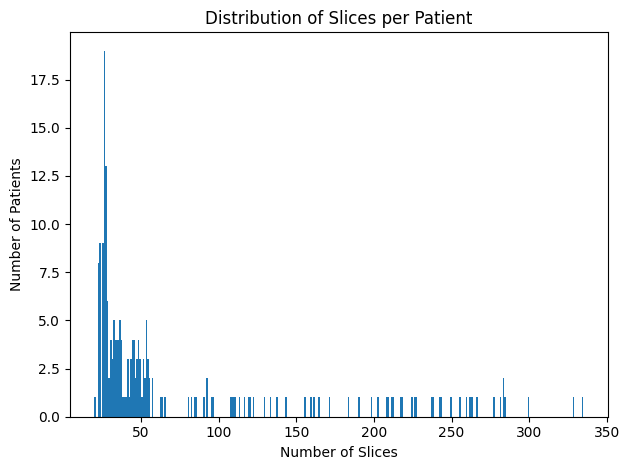

<ipython-input-10-0c70b974dbdc>:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([class_props[c] for c in ["Background", "Kidney", "Tumor"]],


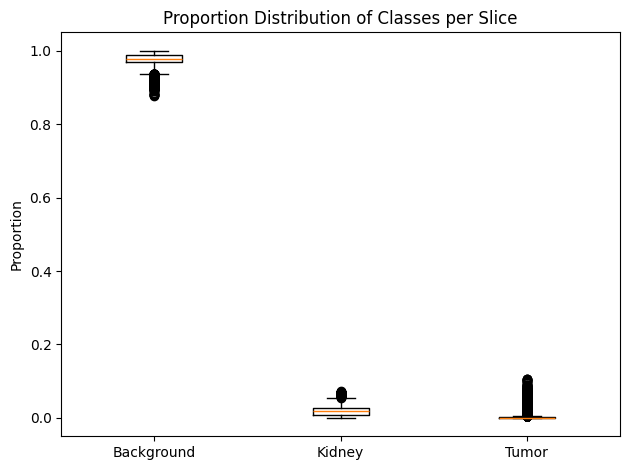

In [ ]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# Adjust this path to your dataset root directory
dataset_dir = Path('/content/drive/MyDrive/Segmented_Radiomic/RAD_dataset')

# --- 1. Slice distribution per patient ---
meta_path = dataset_dir / "dataset_metadata.json"
with open(meta_path, 'r') as f:
    metadata = json.load(f)
slice_info = metadata["slice_info"]

# Count slices per patient
patient_counts = Counter([s["patient_id"] for s in slice_info])
counts = list(patient_counts.values())

# Plot histogram of slices per patient
plt.figure()
plt.hist(counts, bins=range(min(counts), max(counts) + 2))
plt.title("Distribution of Slices per Patient")
plt.xlabel("Number of Slices")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

# --- 2. Class distribution per slice ---
class_props = {"Background": [], "Kidney": [], "Tumor": []}
for s in slice_info:
    mask_path = dataset_dir / s["split"] / "masks" / s["filename"]
    mask = np.array(Image.open(mask_path))
    total = mask.size
    class_props["Background"].append(np.sum(mask == 0) / total)
    class_props["Kidney"].append(np.sum(mask == 127) / total)
    class_props["Tumor"].append(np.sum(mask == 254) / total)

# Plot boxplot of class proportions across slices
plt.figure()
plt.boxplot([class_props[c] for c in ["Background", "Kidney", "Tumor"]],
            labels=["Background", "Kidney", "Tumor"])
plt.title("Proportion Distribution of Classes per Slice")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()
